## InterpolateView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This `Op` wraps the `Views.interpolate()` method of ImgLib2, [interpolating](https://en.wikipedia.org/wiki/Interpolation) any image type into a `RealRandomAccessible`. This allows a `RealRandomAccess` to be created on the `RealRandomAccessible`, allowing decimal pixels to be interrogated. Let's see how the `Op` is called:

In [2]:
ij.op().help('interpolateView')

Available operations:
	(RealRandomAccessible out) =
	net.imagej.ops.transform.interpolateView.DefaultInterpolateView(
		EuclideanSpace in,
		InterpolatorFactory factory)

There are two parameters to `interpolate`:
* `EuclideanSpace in`: [`EuclideanSpace`](http://javadoc.scijava.org/ImgLib2/net/imglib2/EuclideanSpace.html) is a low-level interface that all image types implement. Any image can be passed in as an argument here.
* `InterpolatorFactory factory`: The [`InterpolatorFactory`](http://javadoc.scijava.org/ImgLib2/index.html?net/imglib2/interpolation/InterpolatorFactory.html) tells `interpolateView()` how to create the subpixel data. As listed in the Javadoc there are many different varieties of `InterpolatorFactory`, such as [nearest neighbor](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation), [lanzcos resampling](https://en.wikipedia.org/wiki/Lanczos_resampling), and [N-Linear](https://en.wikipedia.org/wiki/Linear_interpolation).

Let's get a really small image and interpolate it:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


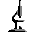

In [3]:
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory
import net.imglib2.interpolation.randomaccess.LanczosInterpolatorFactory

scaleFactors = [4, 4, 1] // Enlarge X and Y by 4x; leave channel count the same.

input = ij.scifio().datasetIO().open("http://imagej.net/images/ij-icon.gif")

interpolated= ij.op().run("interpolateView", input, new NLinearInterpolatorFactory())

ij.notebook().display(input)

Note that we cannot display the interpolated image since it is a `RealRandomAccessible`. However we can interrogate the image for values at decimal pixel values:

In [4]:
access = interpolated.realRandomAccess()

//coordinates to interrogate
x = 16.6 as double
y = 10.2 as double

//set the randomAccess to x in the first dimension and y in the second
access.setPosition(x, 0)
access.setPosition(y, 1)

println(access.get().getRealDouble())

168.0


null

If you want to be able to get a `RandomAccessible` from your `RealRandomAccessible`, check out [`rasterView`](rasterView.ipynb)